In [1]:
import pandas as pd
import numpy as np
import os
import json
import cv2
import random
import sklearn
import pydot
import tqdm
import datetime

from matplotlib import image as mpimg
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import yaml
import torch
from pathlib import Path
import random

import ultralytics
from ultralytics import YOLO

In [2]:
ultralytics.checks()

Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
Setup complete  (12 CPUs, 15.9 GB RAM, 295.2/446.5 GB disk)


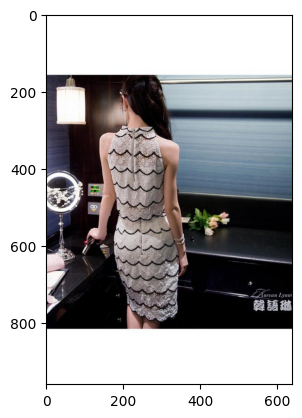

In [3]:
#Test if disk F: can be read
#If not please disconnect then reconnect Disk F:
img_id = "011899"

image = mpimg.imread(f"D:/Benji/deepfashion2_dataset/train/image/{img_id}.jpg")
plt.imshow(image)
plt.show()

In [ ]:
model = YOLO('yolov8n.pt')
results = model.train(data='D:/Benji/yaml/deepfashion2.yaml', epochs=100, batch=32, patience=40, device=0, cls=0.4, dfl=1.0)

New https://pypi.org/project/ultralytics/8.0.215 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.210  Python-3.11.3 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce GTX 1080 Ti, 11264MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:/Benji/yaml/deepfashion2.yaml, epochs=100, patience=40, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fals


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      7/100      4.16G      0.899     0.9444     0.8251        136        640: 100%|██████████| 4049/4049 [22:26<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.502      0.492      0.449      0.376

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      8/100      4.16G     0.8868     0.9204     0.8183         87        640: 100%|██████████| 4049/4049 [22:37<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.504      0.495      0.456      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      9/100      4.16G     0.8806     0.9091     0.8166        109        640: 100%|██████████| 4049/4049

     27/100      4.16G     0.8404     0.8237     0.7948        116        640: 100%|██████████| 4049/4049 [22:30<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.514      0.526      0.487      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     28/100      4.16G     0.8354       0.82     0.7931        102        640: 100%|██████████| 4049/4049 [22:44<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.518      0.527      0.487      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     29/100      4.16G     0.8349     0.8206     0.7931        107        640: 100%|██████████| 4049/4049 [22:38<00:00,
                 Class     Images  Instances      Box(P         

     47/100      4.16G     0.8132     0.7814     0.7832        110        640: 100%|██████████| 4049/4049 [24:20<00:00,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 503/503 [03:
                   all      32153      32153      0.447      0.589      0.494      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     48/100      4.16G     0.8132     0.7986     0.7792        140        640:   0%|          | 12/4049 [00:03<19:46,  

In [ ]:
results = model.val(plots=True)